In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import seaborn as sns
from scipy.stats import normaltest
from scipy.stats import shapiro
import statsmodels.api as sm
import folium

## Restaurant Performance Index Score

In [ ]:
# Read files
yelp_df = pd.read_csv('data/yelp_df_base.csv')
orlando_pop_df = pd.read_csv('data/orlando_pop.csv')
home_value_df = pd.read_csv('data/home_value.csv')

In [ ]:
# One last manual change to the data
yelp_df.loc[yelp_df.business_id == 'LkyRB9vvF-ZQBVKVqonLyw','price_range'] = 1
yelp_df.loc[yelp_df.business_id == '2oPqD_plmEO2s2gA73QJLg','price_range'] = 1
yelp_df_open = yelp_df[yelp_df.is_open == 1]

print('The shape of the open restaurant dataframe is: {}'
      .format(yelp_df_open.shape))
print('The shape of the yelp_df is: {}'
      .format(yelp_df.shape))
print('The shape of the orlando_pop_df is: {}'
      .format(orlando_pop_df.shape))
print('The shape of the home_value_df is: {}'
      .format(home_value_df.shape))

The shape of the open restaurant dataframe is: (2524, 24)
The shape of the yelp_df is: (3607, 24)
The shape of the orlando_pop_df is: (30, 6)
The shape of the home_value_df is: (30, 4)


In [ ]:
# spot some restaurant with total_day == 0 which need to be cleaned
def performance_index_score(df):
    score = (((df.checkin_sum+df.review_count)/df.total_days) 
             * df['price_range'].astype(float))**(1+df.stars*0.08)
    return score

In [ ]:
# We set up a bench mark to filter out business with insufficient data
bench_mark = 5
yelp_df = yelp_df_open[yelp_df_open.total_days >= bench_mark].copy()

print('The dataframe shape of the restaurant opened more than {} days is: {}'
      .format(bench_mark, yelp_df.shape))

The dataframe shape of the restaurant opened more than 5 days is: (2502, 24)


In [ ]:
yelp_df['performance_index_score'] = performance_index_score(yelp_df)

In [ ]:
orlando_geo_features = pd.merge(orlando_pop_df, 
                                home_value_df.drop(['latitude', 'longitude'], axis = 1), 
                                on = ['zipcode'])
orlando_geo_features.columns = ['postal_code', 'population', 'pop_density', 
                                'avg_income', 'latitude', 'longitude', 'avg_housing_price']

print('The shape of the orlando_geo_features is: {}'
      .format(orlando_geo_features.shape))
orlando_geo_features.head(5)

The shape of the orlando_geo_features is: (30, 7)


,postal_code,population,pop_density,avg_income,latitude,longitude,avg_housing_price
0,32789,24557,3147.929753,73938.4426,28.5978,-81.3534,480361.71
1,32792,46914,3816.628702,45745.7203,28.5974,-81.3036,247344.71
2,32801,12050,5273.522976,27798.8516,28.5399,-81.3727,282031.02
3,32803,19020,2735.903337,55839.2906,28.5559,-81.3535,299539.95
4,32804,17312,2364.058446,57793.8146,28.5754,-81.3955,329537.92


In [ ]:
yelp_df_open = yelp_df[yelp_df.is_open == 1].copy()


print('The shape of the yelp_df_open is: {}'
      .format(yelp_df_open.shape))
print('The missing pricerage value of the yelp_df is: {}'
      .format(len(yelp_df[yelp_df.price_range == 0])))
print('The missing pricerage value of the yelp_df_open is: {}'
      .format(len(yelp_df_open[yelp_df_open.price_range == 0])))
print()
print('The columns of the yelp_df_open is: {}'
      .format(yelp_df_open.columns))
yelp_df_open.head(5)

The shape of the yelp_df_open is: (2502, 25)
The missing pricerage value of the yelp_df is: 173
The missing pricerage value of the yelp_df_open is: 173

The columns of the yelp_df_open is: Index(['Unnamed: 0', 'business_id', 'name', 'categories', 'address',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'price_range', 'Latin America', 'North American',
       'Ottoman Cuisine', 'Quick and Greasy', 'European', 'Asian',
       'Cafes & Desserts', 'Other', 'checkin_sum', 'fisrt_record',
       'last_record', 'total_days', 'performance_index_score'],
      dtype='object')


,Unnamed: 0,business_id,name,categories,address,postal_code,latitude,longitude,stars,review_count,...,Quick and Greasy,European,Asian,Cafes & Desserts,Other,checkin_sum,fisrt_record,last_record,total_days,performance_index_score
0,0,ufCxltuh56FF4-ZFZ6cVhg,Sister Honey's,"Restaurants, American (New), Bakeries, Dessert...",247 E Michigan St,32806.0,28.513265,-81.374707,4.5,135,...,0.0,0.0,0.0,1.0,0.0,246,2012-08-29 22:10:36,2020-10-09 20:50:00,2962.944028,0.061449
1,1,GfWJ19Js7wX9rwaHQ7KbGw,Everything POP Shopping & Dining,"Restaurants, American (New), Food Court, Flowe...",1050 Century Dr,32830.0,28.350498,-81.542819,3.0,7,...,1.0,0.0,0.0,0.0,0.0,63,2013-07-12 15:25:43,2020-09-16 03:28:27,2622.501898,0.026424
3,3,qbZJh9lR0gh4Wca96NQv9g,Chuck E. Cheese,"Pizza, Event Planning & Services, Arcades, Par...",7456 W Colonial Dr,32818.0,28.551335,-81.483167,2.0,15,...,1.0,0.0,0.0,0.0,0.0,21,2011-01-05 22:45:45,2018-07-28 21:18:03,2760.939097,0.006512
5,5,y030N-DD6G7lfWHO4A6ezw,Saltgrass Steak House,"Steakhouses, Restaurants, American (Traditiona...",8850 Vineland Ave,32821.0,28.373269,-81.503080,3.5,162,...,0.0,0.0,0.0,0.0,0.0,152,2018-09-18 20:50:24,2020-12-28 22:43:39,832.078646,0.697554
6,6,Xz6aqENKlT4FU-ZBvrf_ow,Bugambilias,"Restaurants, Mexican",747 W Lancaster,32809.0,28.464982,-81.390952,4.5,43,...,0.0,0.0,0.0,0.0,0.0,77,2014-06-20 17:02:35,2020-09-25 23:01:03,2289.248935,0.018134


In [ ]:
yelp_df_open.performance_index_score.fillna(0, inplace = True)

### Correlation Analysis 

To start with, we would like to ask two general questions:

1. What is the relationship between geo_features and the restaurant performance, if any?

2. What is the relationship between restaurant types featuress and the restaurant performance, if any?

In [ ]:
object_df_raw = pd.merge(yelp_df_open, 
                     orlando_geo_features.drop(['latitude','longitude'], axis = 1), 
                     on = 'postal_code')

print('The shape of the object_df_raw is: {}'
      .format(object_df_raw.shape))

The shape of the object_df_raw is: (2298, 29)


In [ ]:
object_df = object_df_raw[object_df_raw.performance_index_score != 0]

print('The shape of the valid object_df is: {}'
      .format(object_df.shape))
print('The missing value percentage of the object_df is: {:.1%}'
      .format((len(object_df_raw) - len(object_df))/len(object_df_raw)))

The shape of the valid object_df is: (2144, 29)
The missing value percentage of the object_df is: 6.7%


In [ ]:
object_df.columns

Index(['Unnamed: 0', 'business_id', 'name', 'categories', 'address',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'price_range', 'Latin America', 'North American',
       'Ottoman Cuisine', 'Quick and Greasy', 'European', 'Asian',
       'Cafes & Desserts', 'Other', 'checkin_sum', 'fisrt_record',
       'last_record', 'total_days', 'performance_index_score', 'population',
       'pop_density', 'avg_income', 'avg_housing_price'],
      dtype='object')

In [ ]:
geo_features = ['population', 'pop_density', 'avg_income', 'avg_housing_price']
restaurant_types = ['Latin America', 'North American', 'Ottoman Cuisine',
                    'Quick and Greasy', 'European', 'Asian', 'Cafes & Desserts']

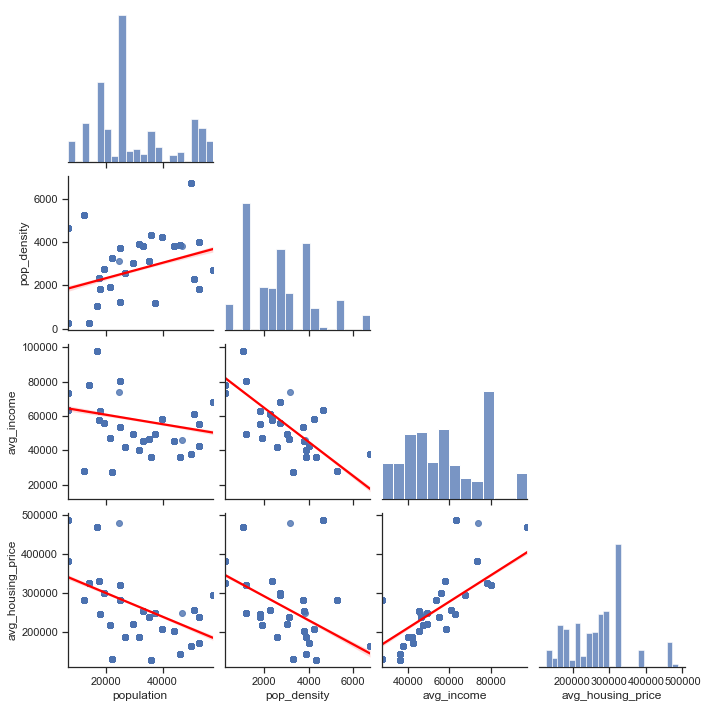

In [ ]:
sns.set(style='ticks', color_codes=True)
pairplot = sns.pairplot(object_df[geo_features], kind='reg', corner=True, plot_kws={'line_kws':{'color':'red'}})

plt.show()

We use the `Pearson correlation coefficient` to summarize the strength of the linear relationship between two data samples.

We use the `Spearman’s correlation coefficient` to summarize the strength between the two data samples if there is a nonlinear relationship; the relationship might be stronger or weaker across the distribution of the variables.

In [ ]:
for features in geo_features:   
    corr1, _ = pearsonr(object_df[features], 
                        object_df['performance_index_score'])
    corr2, _ = spearmanr(object_df[features], 
                         object_df['performance_index_score'])

    print('Pearsons correlation between {} and performance_index_score is: {:.3f}'
          .format(features, corr1))
    print('Spearmanr correlation between {} and performance_index_score is: {:.3f}'
          .format(features, corr2))
    print()

Pearsons correlation between population and performance_index_score is: -0.122
Spearmanr correlation between population and performance_index_score is: -0.189

Pearsons correlation between pop_density and performance_index_score is: -0.098
Spearmanr correlation between pop_density and performance_index_score is: -0.132

Pearsons correlation between avg_income and performance_index_score is: 0.138
Spearmanr correlation between avg_income and performance_index_score is: 0.203

Pearsons correlation between avg_housing_price and performance_index_score is: 0.152
Spearmanr correlation between avg_housing_price and performance_index_score is: 0.261



In [ ]:
for features in restaurant_types:   
    corr1, _ = pearsonr(object_df[features], 
                        object_df['performance_index_score'])
    corr2, _ = spearmanr(object_df[features], 
                         object_df['performance_index_score'])

    print('Pearsons correlation between {} and performance_index_score is: {:.3f}'
          .format(features, corr1))
    print('Spearmanr correlation between {} and performance_index_score is: {:.3f}'
          .format(features, corr2))
    print()

Pearsons correlation between Latin America and performance_index_score is: 0.041
Spearmanr correlation between Latin America and performance_index_score is: 0.029

Pearsons correlation between North American and performance_index_score is: 0.086
Spearmanr correlation between North American and performance_index_score is: 0.218

Pearsons correlation between Ottoman Cuisine and performance_index_score is: -0.018
Spearmanr correlation between Ottoman Cuisine and performance_index_score is: 0.039

Pearsons correlation between Quick and Greasy and performance_index_score is: -0.155
Spearmanr correlation between Quick and Greasy and performance_index_score is: -0.310

Pearsons correlation between European and performance_index_score is: 0.012
Spearmanr correlation between European and performance_index_score is: 0.056

Pearsons correlation between Asian and performance_index_score is: 0.100
Spearmanr correlation between Asian and performance_index_score is: 0.141

Pearsons correlation betwee

The `Asian` and `North American` types show relatively strong positive correlations to the performance index score.

In [ ]:
object_df[restaurant_types].sum()

Latin America       366.0
North American      584.0
Ottoman Cuisine      86.0
Quick and Greasy    912.0
European            214.0
Asian               362.0
Cafes & Desserts    728.0
dtype: float64

#### Normality check 

In [ ]:
checklist = geo_features + ['performance_index_score']

In [ ]:
for feature in checklist:
    data = object_df[feature]
    stat, p = shapiro(data)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')

stat=0.909, p=0.000
Probably not Gaussian
stat=0.945, p=0.000
Probably not Gaussian
stat=0.942, p=0.000
Probably not Gaussian
stat=0.943, p=0.000
Probably not Gaussian
stat=0.386, p=0.000
Probably not Gaussian


In [ ]:
for feature in checklist:
    data = object_df[feature]
    stat, p = normaltest(data)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')

stat=207.506, p=0.000
Probably not Gaussian
stat=113.501, p=0.000
Probably not Gaussian
stat=197.064, p=0.000
Probably not Gaussian
stat=92.929, p=0.000
Probably not Gaussian
stat=2828.355, p=0.000
Probably not Gaussian


We confirmed that none of the features in the checklist have a Gaussian distribution.

### Correlation Table

In this step, we want to discover informative or significant variable that contribute to the performance index score, and also want to have a glance on the relationships among all variables to determine if any interesting pattern exist. 

In [ ]:
object_df[geo_features].corr()

,population,pop_density,avg_income,avg_housing_price
population,1.000000,0.333614,-0.205977,-0.536955
pop_density,0.333614,1.000000,-0.797158,-0.584173
avg_income,-0.205977,-0.797158,1.000000,0.795257
avg_housing_price,-0.536955,-0.584173,0.795257,1.000000


In [ ]:
object_df[restaurant_types].corr()

,Latin America,North American,Ottoman Cuisine,Quick and Greasy,European,Asian,Cafes & Desserts
Latin America,1.000000,0.011990,-0.061160,-0.152163,-0.105588,-0.121764,-0.121137
North American,0.011990,1.000000,-0.061003,-0.227630,-0.067426,-0.135933,-0.075881
Ottoman Cuisine,-0.061160,-0.061003,1.000000,-0.065301,-0.036350,0.009388,-0.031128
Quick and Greasy,-0.152163,-0.227630,-0.065301,1.000000,0.091177,-0.259351,0.056435
European,-0.105588,-0.067426,-0.036350,0.091177,1.000000,-0.121006,-0.048184
Asian,-0.121764,-0.135933,0.009388,-0.259351,-0.121006,1.000000,-0.125985
Cafes & Desserts,-0.121137,-0.075881,-0.031128,0.056435,-0.048184,-0.125985,1.000000


In [ ]:
geo_score_mtx = object_df[geo_features+['performance_index_score']].corr()
geo_score_mtx

,population,pop_density,avg_income,avg_housing_price,performance_index_score
population,1.000000,0.333614,-0.205977,-0.536955,-0.121652
pop_density,0.333614,1.000000,-0.797158,-0.584173,-0.097682
avg_income,-0.205977,-0.797158,1.000000,0.795257,0.138251
avg_housing_price,-0.536955,-0.584173,0.795257,1.000000,0.152257
performance_index_score,-0.121652,-0.097682,0.138251,0.152257,1.000000


This table is where the "correlation does not imply causation" maxim immediately jumps in:

* `avg_income` and `avg_housing_price`: Highly correlated, but no meaningful causal inference can be concluded

* `population` & `pop_density` Versus `avg_income` & `avg_housing_price`: Strong negative correlation. The rationale is straightforward: people with higher income would be less likely to endure high-density resident areas and move to more expensive areas with less population and density. But once again, no causal inference can be concluded at this point



In [ ]:
object_df[restaurant_types+['performance_index_score']].corr()

,Latin America,North American,Ottoman Cuisine,Quick and Greasy,European,Asian,Cafes & Desserts,performance_index_score
Latin America,1.000000,0.011990,-0.061160,-0.152163,-0.105588,-0.121764,-0.121137,0.040679
North American,0.011990,1.000000,-0.061003,-0.227630,-0.067426,-0.135933,-0.075881,0.086460
Ottoman Cuisine,-0.061160,-0.061003,1.000000,-0.065301,-0.036350,0.009388,-0.031128,-0.018228
Quick and Greasy,-0.152163,-0.227630,-0.065301,1.000000,0.091177,-0.259351,0.056435,-0.155047
European,-0.105588,-0.067426,-0.036350,0.091177,1.000000,-0.121006,-0.048184,0.012082
Asian,-0.121764,-0.135933,0.009388,-0.259351,-0.121006,1.000000,-0.125985,0.100336
Cafes & Desserts,-0.121137,-0.075881,-0.031128,0.056435,-0.048184,-0.125985,1.000000,-0.034442
performance_index_score,0.040679,0.086460,-0.018228,-0.155047,0.012082,0.100336,-0.034442,1.000000


At this stage, based on the general overview, we find that:

* We find that the `Quick and Greasy` type has a relatively noticable negative correlation with the `performance_index_score`
* We find that `North American` and `Asian` types have a relatively noticable positive correlations with the `performance_index_score`
* As we expect, business types are negatively correlated with each other, there is a trivial positive correlation among `European`, `Cafes & Desserts` and `Quick and Greasy`, suggesting certain common traits might exist.

We will further examinate the data by passing conditions and filters.

### Community feature efffects on performance_index_score by restaurant type

In [ ]:
# first we try to conduct this condition control on `Latin American` type
object_df[geo_features+['performance_index_score']][object_df['Latin America'] == 1].corr()[-1:]

,population,pop_density,avg_income,avg_housing_price,performance_index_score
performance_index_score,-0.218238,-0.192793,0.279041,0.321556,1.0


In [ ]:
# Let's look at the overall situation.
geo_by_type_mtx = np.concatenate(
    [object_df[
        geo_features+['performance_index_score']
    ][object_df[types] == 1].corr()[-1:].values[:,:-1] 
     for types in restaurant_types
    ]
)

geo_by_type_df = pd.DataFrame(geo_by_type_mtx,
                              index = [types for types in restaurant_types],
                              columns = [features for features in geo_features])
geo_by_type_df

,population,pop_density,avg_income,avg_housing_price
Latin America,-0.218238,-0.192793,0.279041,0.321556
North American,-0.150332,-0.114682,0.196883,0.233770
Ottoman Cuisine,-0.199407,-0.200379,0.180093,0.169010
Quick and Greasy,-0.072934,-0.070964,0.104327,0.093723
European,-0.108204,-0.030339,0.075622,0.113141
Asian,-0.224515,-0.088264,0.137481,0.203427
Cafes & Desserts,-0.113575,-0.063215,0.104683,0.143380


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'population'),
  Text(1.5, 0, 'pop_density'),
  Text(2.5, 0, 'avg_income'),
  Text(3.5, 0, 'avg_housing_price')])

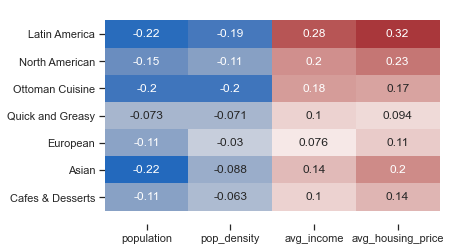

In [ ]:
ax = sns.heatmap(geo_by_type_df, cmap = 'vlag', annot=True, cbar=False)
sns.set(rc={'figure.figsize':(9.7,5.27)})
# line below is to adjust to an inherent bug that would cut the first and last row in half 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(rotation=0) 

> We can generate a various of insights from the graph above. 

> We would further construct a table that shows how each figure diviate from general stats

In [ ]:
# First we retrive the general stats
overall_value = geo_score_mtx.drop('performance_index_score', axis = 1)[-1:].values 
geo_score_mtx.drop('performance_index_score', axis = 1)[-1:]

,population,pop_density,avg_income,avg_housing_price
performance_index_score,-0.121652,-0.097682,0.138251,0.152257


In [ ]:
# Construct a new table to show the diviation from general stats
geo_by_type_mtx_diff = np.concatenate(
    [object_df[
        geo_features+['performance_index_score']
    ][object_df[types] == 1].corr()[-1:].values[:,:-1]-overall_value
     for types in restaurant_types
    ]
)

geo_by_type_diff_df = pd.DataFrame(geo_by_type_mtx_diff,
                              index = [types for types in restaurant_types],
                              columns = [features for features in geo_features])
geo_by_type_diff_df

,population,pop_density,avg_income,avg_housing_price
Latin America,-0.096586,-0.095110,0.140790,0.169300
North American,-0.028680,-0.017000,0.058632,0.081514
Ottoman Cuisine,-0.077755,-0.102696,0.041842,0.016754
Quick and Greasy,0.048718,0.026718,-0.033924,-0.058534
European,0.013448,0.067344,-0.062629,-0.039116
Asian,-0.102863,0.009419,-0.000770,0.051170
Cafes & Desserts,0.008077,0.034468,-0.033568,-0.008877


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'population'),
  Text(1.5, 0, 'pop_density'),
  Text(2.5, 0, 'avg_income'),
  Text(3.5, 0, 'avg_housing_price')])

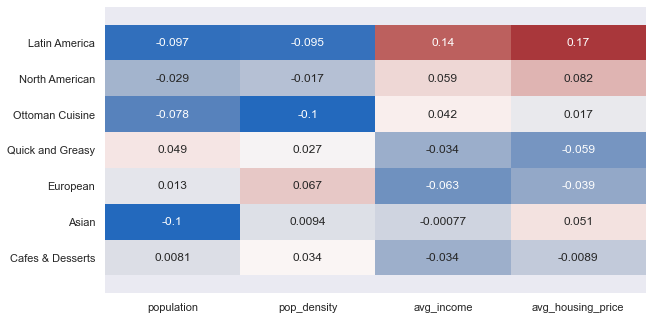

In [ ]:
ax_diff = sns.heatmap(geo_by_type_diff_df, cmap = 'vlag', annot=True, cbar=False)

sns.set(rc={'figure.figsize':(9.7,5.27)})
bottom, top = ax_diff.get_ylim()
ax_diff.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(rotation=0) 

With the heatmap above, with respect to data restriction, we conclude as following:

A. `Population` and `population density` have a general `negative correlation` with reastaurant performance. 
 - Among all reastaurant types, `Quick and Greasy`, `European`, and `Cafes & Desserts` type of restaurant shows above par performance under the negative correlation. 
 - Among all restaurant types, `Latin America` and `Ottoman Cuisine` types of restaurant shows significant below par performance under the negative correlation

B. `avg_income` and `avg_housing_price` have a geenral `positive correlation` with reastaurant performance. 
 - Among all reastaurant types, `Latin America`, `North American`, and `Ottoman Cuisine` type of restaurant shows above par performance under the positive correlation. 
 - Among all reastaurant types, `Quick and Greasy` and `European` type of restaurant shows above par performance under the positive correlation. 
 
C. There is one abnormal finding here, the `Asian` type, showing inconsistent performance under different correlation.

In [ ]:
expand_mtx = object_df[geo_features + restaurant_types].corr()
expand_mtx[4:][geo_features]

,population,pop_density,avg_income,avg_housing_price
Latin America,0.090175,0.052475,-0.046847,-0.071695
North American,-0.041720,-0.066693,0.058874,0.045116
Ottoman Cuisine,0.011303,-0.003905,0.035292,0.029712
Quick and Greasy,0.089298,0.052586,-0.055830,-0.083589
European,-0.045379,-0.024298,0.022709,0.041432
Asian,0.032826,-0.012116,0.004744,-0.010353
Cafes & Desserts,-0.014372,0.050504,-0.048098,-0.017572


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'population'),
  Text(1.5, 0, 'pop_density'),
  Text(2.5, 0, 'avg_income'),
  Text(3.5, 0, 'avg_housing_price')])

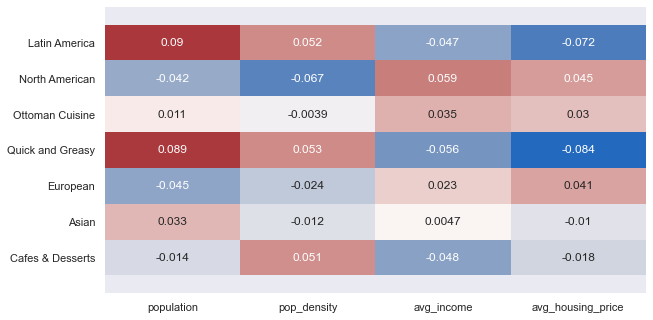

In [ ]:
ax_expand_mtx = sns.heatmap(expand_mtx[4:][geo_features], cmap = 'vlag', annot=True, cbar=False)

sns.set(rc={'figure.figsize':(9.7,5.27)})
bottom, top = ax_expand_mtx.get_ylim()
ax_expand_mtx.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(rotation=0) 

With the graph above shows, none of the geo-features have significant or noticable correlation to the allocation of certain types of restaurant. 

We can conclude that the finding from the previous graph of `geo-feature efffects on performance_index_score by restaurant type` are applicable through different areas with different geo attributes.

### Leading restaurant and Dominating restaurant

In [ ]:
top3_df = object_df.sort_values(
    'performance_index_score', ascending = False).groupby(
    'postal_code')[[
    'name', 'postal_code', 
    'performance_index_score']+
    geo_features+restaurant_types].head(3).sort_values('postal_code')

top3_df[['postal_code', 'name', 
         'performance_index_score'] + restaurant_types + geo_features].tail(5)


,postal_code,name,performance_index_score,Latin America,North American,Ottoman Cuisine,Quick and Greasy,European,Asian,Cafes & Desserts,population,pop_density,avg_income,avg_housing_price
1948,32837.0,"The Ritz-Carlton Orlando, Grande Lakes",1.732077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51219,2277.614728,60996.7092,256902.53
1867,32837.0,"JW Marriott Orlando, Grande Lakes",1.469850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51219,2277.614728,60996.7092,256902.53
1042,32839.0,Keke's Breakfast Cafe,1.256063,0.0,1.0,0.0,1.0,0.0,0.0,1.0,50279,6749.765069,37614.4410,165115.48
987,32839.0,Earls Kitchen + Bar,3.022107,0.0,1.0,0.0,0.0,0.0,0.0,0.0,50279,6749.765069,37614.4410,165115.48
1031,32839.0,The Cheesecake Factory,1.460646,0.0,1.0,0.0,0.0,0.0,0.0,1.0,50279,6749.765069,37614.4410,165115.48


In [ ]:
def performance_stats(df):
    return df.groupby('postal_code').agg({
    'performance_index_score':
    {'Mean': np.mean,
     'Median':np.median,
     'Count': 'count'}}).sort_values(('performance_index_score', 'Mean'),
                                     ascending = False)

In [ ]:
restaurant_types

['Latin America',
 'North American',
 'Ottoman Cuisine',
 'Quick and Greasy',
 'European',
 'Asian',
 'Cafes & Desserts']

In [ ]:
def performance_stats1(df):
    return df.groupby('postal_code')[['performance_index_score']
                                    ].agg({'performance_index_score':{'Mean': np.mean,
                                                                      'Count': 'count'}})

def performance_stats2(df):
    return df.groupby('postal_code')[['performance_index_score']
                                    ].sum()

In [ ]:
pd.concat([performance_stats2(object_df[object_df[types] == 1]) for types in restaurant_types],
          axis = 1, keys = restaurant_types)

,Latin America,North American,Ottoman Cuisine,Quick and Greasy,European,Asian,Cafes & Desserts
,performance_index_score,performance_index_score,performance_index_score,performance_index_score,performance_index_score,performance_index_score,performance_index_score
postal_code,,,,,,,
32789.0,0.002271,NaN,NaN,0.002271,NaN,NaN,NaN
32792.0,NaN,NaN,NaN,0.059382,NaN,NaN,NaN
32801.0,12.077470,27.995450,2.370478,6.834964,9.797420,12.278045,19.712678
32803.0,34.509666,31.365996,1.313953,35.787176,20.169619,69.465048,60.311907
32804.0,0.641995,8.695533,0.907361,4.690838,3.082715,5.062904,7.756043
32805.0,0.302539,0.357950,0.022445,0.685812,0.216655,NaN,0.100264
32806.0,5.460124,5.366754,1.943208,9.248018,4.305688,4.666339,13.713235
32807.0,1.068533,0.743919,0.245246,3.982905,0.268127,6.989845,4.864856


We define dominating restaurant type when it have high accumulated scores within a postal_code, since the sum of scores contain both mean performance and the restaurant amount. 

### Senario Analysis - 32819 & 32801

The two postal code area have very different geo features, `32819` have very high `avg_housing_price` & `income`, but low `pop_density`; meanwhile the `32801` have excatly the opposite features.

We aim to look into the senario and provide the last layer of our analysis, that is to answer to stakeholder's question of "given a region, what types of restaurant would be recommended"

In [ ]:
df_32819 = object_df[object_df['postal_code'] == 32819]
df_32801 = object_df[object_df['postal_code'] == 32801]

In [ ]:
def return_type_mean(df, types):
    return df[df[types] == 1]['performance_index_score'].mean()

In [ ]:
mean_32819 = pd.DataFrame([return_type_mean(df_32819, types) for types in restaurant_types], 
             index = restaurant_types,
             columns = [32819])
mean_32801 = pd.DataFrame([return_type_mean(df_32801, types) for types in restaurant_types], 
             index = restaurant_types,
             columns = [32801])
compare_table = pd.concat([mean_32819, mean_32801], axis = 1)
compare_table

,32819,32801
Latin America,1.021148,0.603873
North American,0.875020,0.699886
Ottoman Cuisine,0.582931,0.474096
Quick and Greasy,0.450978,0.195285
European,0.565176,0.612339
Asian,1.113050,0.877003
Cafes & Desserts,0.586838,0.505453


The result above are align with our previous finding and early conclusions. Meanwhile, it is suprising that the `Quick and Greasy` type of restaurant are also perform significantly better in `32819`. 

This might be a result of the skewness of the performance index scores. After examinate the median, we conclude that the actual differences of `Quick and Greasy` type between two region is trivial or insignificant.

### Regression

We want to see if we could determine the if the correlation is significant given the current assumptions and datasets.

We conducted seperete regression on both region, to see if the restaurant_type have robust effect on the performance score.

In [ ]:
def print_summary_table(df, condition):
    X = df[df[condition] == 1][geo_features] / 10000
    y = df[df[condition] == 1]['performance_index_score'] 
    X2 = sm.add_constant(X)

    est = sm.OLS(y, X2)
    est2 = est.fit()
    print(est2.summary())

In [ ]:
X = df_32819[restaurant_types]
y = df_32819['performance_index_score']
X2 = sm.add_constant(X)

est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                               OLS Regression Results                              
Dep. Variable:     performance_index_score   R-squared:                       0.032
Model:                                 OLS   Adj. R-squared:                  0.015
Method:                      Least Squares   F-statistic:                     1.914
Date:                     Tue, 14 Sep 2021   Prob (F-statistic):             0.0660
Time:                             19:01:16   Log-Likelihood:                -765.33
No. Observations:                      410   AIC:                             1547.
Df Residuals:                          402   BIC:                             1579.
Df Model:                                7                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

C:\Users\aliso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


> At `alpha = 0.05` significant level, none of the restaurant type coefficient is statistically significant and we would accept the null hypothesis that they have very litter to next to litter effect on the performance score.

> At `alpha = 0.10` significant level, we find that `Quick and Greasy` have a significant negative relation with the performance score; we also have `Asian` have a moderate positive correlation with performance score. Both new finding align with our early conclusions.

> Now we look at the other postal code area.

In [ ]:
X = df_32801[restaurant_types]
y = df_32801['performance_index_score']
X2 = sm.add_constant(X)

est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                               OLS Regression Results                              
Dep. Variable:     performance_index_score   R-squared:                       0.114
Model:                                 OLS   Adj. R-squared:                  0.061
Method:                      Least Squares   F-statistic:                     2.158
Date:                     Tue, 14 Sep 2021   Prob (F-statistic):             0.0429
Time:                             19:01:16   Log-Likelihood:                -142.13
No. Observations:                      125   AIC:                             300.3
Df Residuals:                          117   BIC:                             322.9
Df Model:                                7                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

C:\Users\aliso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


* At `alpha = 0.05` significant level, none of the restaurant type coefficient is statistically significant and we would accept the null hypothesis that they have very litter to next to litter effect on the performance score.
* At `alpha = 0.10` significant level, we find that `Quick and Greasy` have a significant negative relation with the performance score; we have `Asian` and `Norht American` have a moderate positive correlation with performance score. 

Both new findings align with early conclusions.

In [ ]:
print_summary_table(object_df, 'North American')

                               OLS Regression Results                              
Dep. Variable:     performance_index_score   R-squared:                       0.066
Model:                                 OLS   Adj. R-squared:                  0.059
Method:                      Least Squares   F-statistic:                     10.19
Date:                     Tue, 14 Sep 2021   Prob (F-statistic):           5.64e-08
Time:                             19:01:17   Log-Likelihood:                -866.42
No. Observations:                      584   AIC:                             1743.
Df Residuals:                          579   BIC:                             1765.
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

C:\Users\aliso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print_summary_table(object_df, 'Asian')

                               OLS Regression Results                              
Dep. Variable:     performance_index_score   R-squared:                       0.065
Model:                                 OLS   Adj. R-squared:                  0.054
Method:                      Least Squares   F-statistic:                     6.155
Date:                     Tue, 14 Sep 2021   Prob (F-statistic):           8.46e-05
Time:                             19:01:17   Log-Likelihood:                -616.85
No. Observations:                      362   AIC:                             1244.
Df Residuals:                          357   BIC:                             1263.
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

C:\Users\aliso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print_summary_table(object_df, 'Latin America')

                               OLS Regression Results                              
Dep. Variable:     performance_index_score   R-squared:                       0.121
Model:                                 OLS   Adj. R-squared:                  0.111
Method:                      Least Squares   F-statistic:                     12.41
Date:                     Tue, 14 Sep 2021   Prob (F-statistic):           1.83e-09
Time:                             19:01:17   Log-Likelihood:                -602.14
No. Observations:                      366   AIC:                             1214.
Df Residuals:                          361   BIC:                             1234.
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

C:\Users\aliso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print_summary_table(object_df, 'Quick and Greasy')

                               OLS Regression Results                              
Dep. Variable:     performance_index_score   R-squared:                       0.016
Model:                                 OLS   Adj. R-squared:                  0.011
Method:                      Least Squares   F-statistic:                     3.574
Date:                     Tue, 14 Sep 2021   Prob (F-statistic):            0.00669
Time:                             19:01:17   Log-Likelihood:                -861.83
No. Observations:                      912   AIC:                             1734.
Df Residuals:                          907   BIC:                             1758.
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

C:\Users\aliso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print_summary_table(object_df, 'Ottoman Cuisine')

                               OLS Regression Results                              
Dep. Variable:     performance_index_score   R-squared:                       0.069
Model:                                 OLS   Adj. R-squared:                  0.023
Method:                      Least Squares   F-statistic:                     1.495
Date:                     Tue, 14 Sep 2021   Prob (F-statistic):              0.212
Time:                             19:01:17   Log-Likelihood:                -62.072
No. Observations:                       86   AIC:                             134.1
Df Residuals:                           81   BIC:                             146.4
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

C:\Users\aliso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
ScoreSum_by_type = pd.concat([performance_stats2(object_df[object_df[types] == 1]) 
                              for types in restaurant_types],
          axis = 1, keys = restaurant_types)

We define dominating restaurant type when it have high accumulated scores within a postal_code, since the sum of scores contain both mean performance and the restaurant amount.

In [ ]:
ScoreSum_by_type['top_percent'] = ScoreSum_by_type.max(axis = 1)/ScoreSum_by_type.sum(axis = 1)
ScoreSum_by_type['score_sum'] = ScoreSum_by_type.sum(axis = 1)
ScoreSum_by_type.columns = ScoreSum_by_type.columns.droplevel(1)
ScoreSum_by_type.columns

Index(['Latin America', 'North American', 'Ottoman Cuisine',
       'Quick and Greasy', 'European', 'Asian', 'Cafes & Desserts',
       'top_percent', 'score_sum'],
      dtype='object')

In [ ]:
mask_1_df = object_df.groupby('postal_code')[['performance_index_score']
                                ].agg(['sum', 'count']
                                     ).sort_values(by = ('performance_index_score', 'sum'))

mask_1 = mask_1_df[(mask_1_df[('performance_index_score', 'sum')] < 6) 
       |
       (mask_1_df[('performance_index_score', 'count')] < 30)].index

In [ ]:
ScoreSum_by_type['Dominating_type'] = ScoreSum_by_type.iloc[:, :-3].idxmax(axis=1)
ScoreSum_by_type.loc[mask_1,'Dominating_type'] = 'indecisive'
ScoreSum_by_type['score_level'] = ScoreSum_by_type.score_sum * ScoreSum_by_type.top_percent

In [ ]:
Dominating_type = ScoreSum_by_type[['Dominating_type','score_level']].reset_index()

Dominating_type['Type_encode'] = 0
Dominating_type.loc[Dominating_type['Dominating_type'] == 'North American', 'Type_encode'] = 1
Dominating_type.loc[Dominating_type['Dominating_type'] == 'Quick and Greasy', 'Type_encode'] = 2
Dominating_type.loc[Dominating_type['Dominating_type'] == 'Asian', 'Type_encode'] = 3
Dominating_type.loc[Dominating_type['Dominating_type'] == 'Latin America', 'Type_encode'] = 4
Dominating_type.postal_code = Dominating_type.postal_code.astype(int)

orlando_gps = orlando_pop_df[['zipcode','latitude', 'longitude']]
orlando_gps.columns = ['postal_code','latitude', 'longitude']

In [ ]:
Dominating_type_df = Dominating_type.merge(orlando_gps, on = 'postal_code')

## Generate a Restaurant Map

In [ ]:
Dominating_type_df.columns = ['zipcode', 'Dominating_type', 'score_level', 'Type_encode',
       'latitude', 'longitude']

Dominating_type_df.zipcode = Dominating_type_df.zipcode.astype(str)

In [ ]:
df2 = {"zipcode":"32831", "Dominating_type":"indecisive", "score_level": 0, "Type_encode": 0, "latitude": 28.4650, "longitude": 81.1306}
Dominating_type_df = Dominating_type_df.append(df2, ignore_index=True)
Dominating_type_df

,zipcode,Dominating_type,score_level,Type_encode,latitude,longitude
0,32789,indecisive,0.252271,0,28.5978,-81.3534
1,32792,indecisive,1.059382,0,28.5974,-81.3036
2,32801,North American,28.089956,1,28.5399,-81.3727
3,32803,Asian,69.540479,3,28.5559,-81.3535
4,32804,North American,8.775046,1,28.5754,-81.3955
5,32805,indecisive,0.851339,0,28.5302,-81.4045
6,32806,Quick and Greasy,13.807337,2,28.5140,-81.3570
7,32807,Asian,7.137940,3,28.5515,-81.3051
8,32808,Quick and Greasy,4.475571,2,28.5803,-81.4396
9,32809,Quick and Greasy,6.696548,2,28.4637,-81.3948


In [ ]:
orlando_geo = r'data/city_orlando.geojson'
restaurant_map = folium.Map(location=[28.5384, -81.3789], zoom_start=11, tiles='cartodbpositron')
choropleth = folium.Choropleth(
    geo_data = orlando_geo,
    name="choropleth",
    data = Dominating_type_df,
    key_on = 'feature.properties.name',
    columns = ['zipcode','Type_encode'],
    fill_color='BuGn',
    fill_opacity=0.5,
    line_opacity = 0.1,
    highlight = True).add_to(restaurant_map)

for key in choropleth._children:
    if key.startswith('color_map'):
        del(choropleth._children[key])

for i in range(0, len(Dominating_type_df)):
    iframe = folium.IFrame('Zipcode: ' + Dominating_type_df.iloc[i]['zipcode'] +'<br>' + 'Restaurant Type: ' + Dominating_type_df.iloc[i]['Dominating_type'])
    popup = folium.Popup(iframe, min_width=150, max_width=100)
    folium.Marker(
        location=[Dominating_type_df.iloc[i]['latitude'], Dominating_type_df.iloc[i]['longitude']],
        popup=popup
    ).add_to(restaurant_map)

colourstep = folium.LinearColormap(['#bebada', '#ffffb3',  '#fb8072', '#80b1d3', '#fdb462'], vmin=0, vmax=4.5).to_step(5)
df_dict = Dominating_type_df.set_index('zipcode')['Type_encode']
style_f = lambda x: {'fillColor': colourstep(df_dict[x['properties']['name']]), "color": "grey", "weight": 0.8}
choropleth.geojson.style_function = style_f
choropleth.add_to(restaurant_map)

restaurant_map